In [7]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from scipy import misc
from shutil import copyfile
import matplotlib.pyplot as plt
import keras as keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model,load_model,Sequential
import pandas as pd

In [8]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.15,
    zoom_range=0.2,
    #fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=r"/kaggle/input/animal-faces/afhq/train",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    directory=r"/kaggle/input/animal-faces/afhq/val",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [9]:
model_name = 'EfficientNetB5'
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False,
                                                               weights='imagenet',
                                                               input_shape=(150,150,3),
                                                               pooling='max')
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001 )(x)
x=Dense(512,
        kernel_regularizer = regularizers.l2(l=0.013),
        activity_regularizer=regularizers.l1(0.007),
        bias_regularizer=regularizers.l1(0.006),
        activation = 'relu')(x)

x=Dropout(rate=.44,seed=42)(x)

output=Dense(3,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])



In [10]:
history=model.fit(train_generator,epochs=5,verbose=2,validation_data=validation_generator)

Epoch 1/5
1220/1220 - 305s - loss: 4.8915 - accuracy: 0.9317 - val_loss: 1.4088 - val_accuracy: 0.9933
Epoch 2/5
1220/1220 - 258s - loss: 0.7092 - accuracy: 0.9805 - val_loss: 0.3008 - val_accuracy: 0.9960
Epoch 3/5
1220/1220 - 257s - loss: 0.2404 - accuracy: 0.9917 - val_loss: 0.1572 - val_accuracy: 0.9973
Epoch 4/5
1220/1220 - 258s - loss: 0.1696 - accuracy: 0.9932 - val_loss: 0.1660 - val_accuracy: 0.9933
Epoch 5/5
1220/1220 - 259s - loss: 0.1390 - accuracy: 0.9942 - val_loss: 0.2653 - val_accuracy: 0.9767


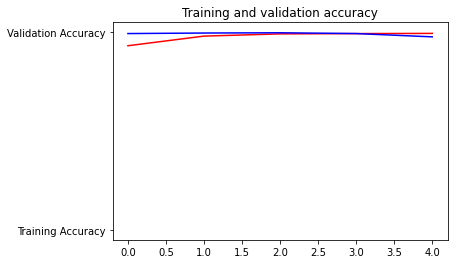

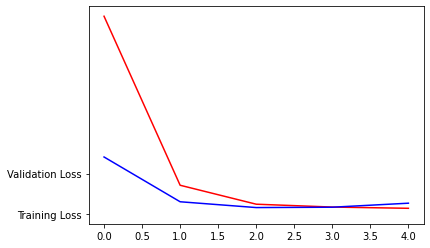

In [11]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

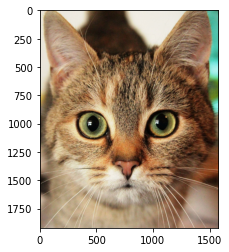

In [18]:
img = plt.imread('../input/testing-images/cat.jpeg')
imgplot = plt.imshow(img)
img = tf.image.resize(images=img,size=(150,150))

img = tf.expand_dims(img, axis=0)

In [19]:
classes = ['cat','dog','wild']

pred = (model.predict(img))
index = np.argmax(pred[0])
        
print("Image is a " + str(classes[index])  + ". The probability is " + str(round(pred[0][index]*100)))


Image is a cat. The probability is 99
